In [17]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("data/property_data.csv")

In [7]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [10]:
data.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [11]:
missing_values = ["na", "--", "n/a"]

In [27]:
data = pd.read_csv("data/property_data.csv", na_values = missing_values)

In [28]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [29]:
i = 0
for r in data["OWN_OCCUPIED"]:
    if (r != 'Y') and (r != 'N'):
        data.loc[i, 'OWN_OCCUPIED'] = np.nan
    i += 1
    

In [36]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [37]:
i = 0
for r in data["NUM_BATH"]:
    try:
        a = int(float(r))
        data.loc[i, "NUM_BATH"] = a
    except:
        print(r)
        data.loc[i, "NUM_BATH"] = np.nan
    i += 1
    

nan
HURLEY


In [56]:
data.describe()

,PID,ST_NUM,NUM_BEDROOMS,NUM_BATH,SQ_FT
count,8.000000e+00,7.000000,5.000000,9.000000,9.000000
mean,1.000050e+08,191.428571,2.400000,1.222222,1100.000000
std,2.927700e+03,39.080503,0.894427,0.440959,368.272997
min,1.000010e+08,104.000000,1.000000,1.000000,700.000000
25%,1.000028e+08,199.000000,2.000000,1.000000,850.000000
50%,1.000050e+08,203.000000,3.000000,1.000000,1000.000000
75%,1.000072e+08,210.000000,3.000000,1.000000,1100.000000
max,1.000090e+08,215.000000,3.000000,2.000000,1800.000000


In [42]:
data['SQ_FT'].fillna(500)

0    1000.0
1     500.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7     500.0
8    1800.0
Name: SQ_FT, dtype: float64

In [46]:
data['SQ_FT'].fillna(data['SQ_FT'].mean(),inplace=True)

In [44]:
data['SQ_FT'].fillna(data['SQ_FT'].median())

0    1000.0
1     950.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7     950.0
8    1800.0
Name: SQ_FT, dtype: float64

In [47]:
data['NUM_BATH'].fillna(data['NUM_BATH'].median(),inplace=True)

In [52]:

data['OWN_OCCUPIED'].fillna(data['OWN_OCCUPIED'].mode()[0])

0    Y
1    N
2    N
3    Y
4    Y
5    Y
6    Y
7    Y
8    Y
Name: OWN_OCCUPIED, dtype: object

## EDA

In [58]:
data = pd.ExcelFile('data/obes.xls')

In [60]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [65]:
data_age = data.parse('7.2', skiprows=4,skipfooter=14)

In [68]:
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
data_age.dropna(inplace=True)

In [72]:
data_age.set_index("Year", inplace=True)

<Axes: xlabel='Year'>

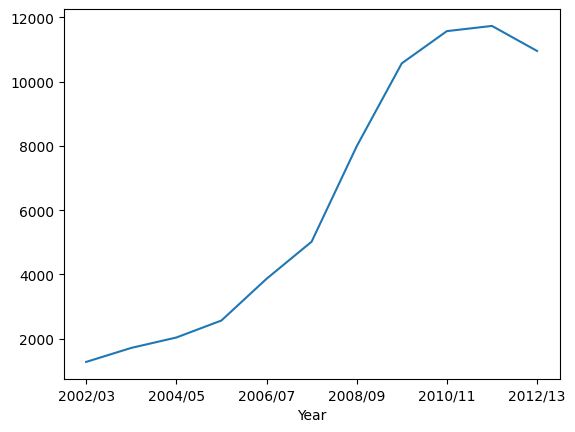

In [73]:
data_age['Total'].plot()

In [74]:
data_age.columns

Index(['Total', 'Under 16', '16-24', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75 and over'],
      dtype='object')

<Axes: xlabel='Year'>

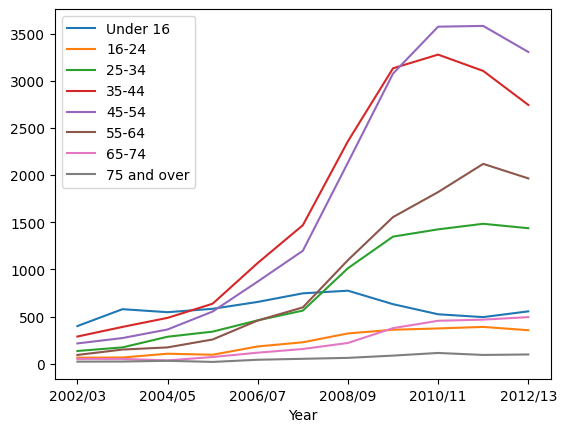

In [75]:
col = ['Under 16', '16-24', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75 and over']
data_age[col].plot()

<Axes: xlabel='Year'>

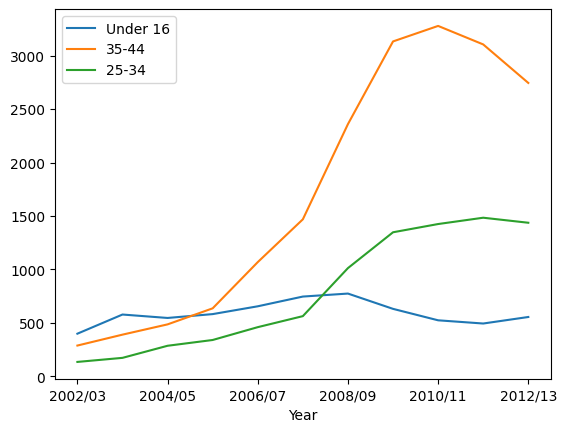

In [77]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)
data_age['25-34'].plot(label="25-34", legend=True)


In [78]:
from datetime import datetime

In [81]:
date_rng = pd.date_range(start='2023-01-01', end='2023-08-01', freq='H')

In [83]:
d = pd.DataFrame(date_rng,columns=['date'])

In [84]:
d['value'] = np.random.randint(10,100,size=(len(date_rng)))

,date,value
0,2023-01-01 00:00:00,76
1,2023-01-01 01:00:00,20
2,2023-01-01 02:00:00,99
3,2023-01-01 03:00:00,56
4,2023-01-01 04:00:00,73
...,...,...
5084,2023-07-31 20:00:00,60
5085,2023-07-31 21:00:00,20
5086,2023-07-31 22:00:00,99
5087,2023-07-31 23:00:00,43


In [87]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5089 entries, 0 to 5088
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5089 non-null   datetime64[ns]
 1   value   5089 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 79.6 KB


In [89]:
d.set_index('date',inplace=True)

<Axes: xlabel='date'>

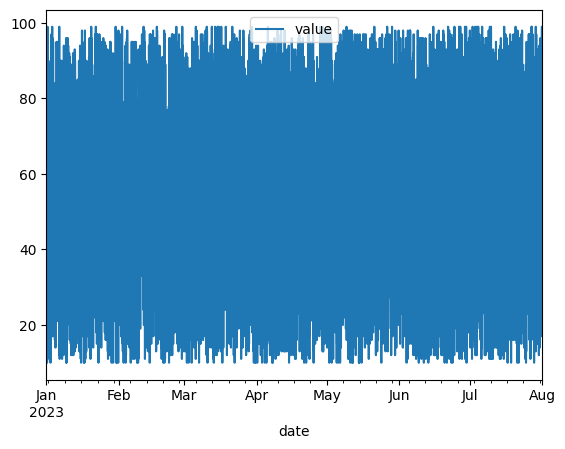

In [90]:
d.plot()

In [93]:
date_string = [str(x) for x in date_rng]

In [96]:
pd.to_datetime(date_string)

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-07-31 15:00:00', '2023-07-31 16:00:00',
               '2023-07-31 17:00:00', '2023-07-31 18:00:00',
               '2023-07-31 19:00:00', '2023-07-31 20:00:00',
               '2023-07-31 21:00:00', '2023-07-31 22:00:00',
               '2023-07-31 23:00:00', '2023-08-01 00:00:00'],
              dtype='datetime64[ns]', length=5089, freq=None)

In [97]:
str_date2 = ['June-01-2023', 'June-02-2023']

In [103]:
sd2 = [datetime.strptime(x, '%B-%d-%Y') for x in str_date2]

In [104]:
pd.DataFrame(sd2,columns=['date'])

,date
0,2023-06-01
1,2023-06-02


In [111]:
d[d.index.month == 3]

,value
date,
2023-03-01 00:00:00,21
2023-03-01 01:00:00,78
2023-03-01 02:00:00,65
2023-03-01 03:00:00,82
2023-03-01 04:00:00,27
...,...
2023-03-31 19:00:00,41
2023-03-31 20:00:00,89
2023-03-31 21:00:00,54


In [112]:
d['2023-02-01':'2023-03-01']

,value
date,
2023-02-01 00:00:00,88
2023-02-01 01:00:00,59
2023-02-01 02:00:00,86
2023-02-01 03:00:00,22
2023-02-01 04:00:00,75
...,...
2023-03-01 19:00:00,45
2023-03-01 20:00:00,46
2023-03-01 21:00:00,17


In [116]:
d_daily = d.resample('D').mean()

In [120]:
d_daily['moving_sum'] = d_daily.rolling(3).sum()

In [123]:
d_daily['moving_average'] = d_daily['value'].rolling(7).mean()

In [124]:
d_daily

,value,moving_sum,moving_average
date,,,
2023-01-01,56.750000,NaN,NaN
2023-01-02,59.541667,NaN,NaN
2023-01-03,59.833333,176.125000,NaN
2023-01-04,54.333333,173.708333,NaN
2023-01-05,51.166667,165.333333,NaN
...,...,...,...
2023-07-28,55.500000,172.666667,55.273810
2023-07-29,54.875000,170.458333,55.071429
2023-07-30,57.666667,168.041667,55.392857


In [127]:
d_daily['moving_average'].fillna(method='backfill',inplace=True)

In [128]:
d_daily

,value,moving_sum,moving_average
date,,,
2023-01-01,56.750000,NaN,55.619048
2023-01-02,59.541667,NaN,55.619048
2023-01-03,59.833333,176.125000,55.619048
2023-01-04,54.333333,173.708333,55.619048
2023-01-05,51.166667,165.333333,55.619048
...,...,...,...
2023-07-28,55.500000,172.666667,55.273810
2023-07-29,54.875000,170.458333,55.071429
2023-07-30,57.666667,168.041667,55.392857


In [130]:
d = pd.read_csv('data/opsd_germany_daily.csv')

In [132]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [137]:
d = pd.read_csv('data/opsd_germany_daily.csv',index_col=0, parse_dates=True)

In [138]:
d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


<Axes: xlabel='Date'>

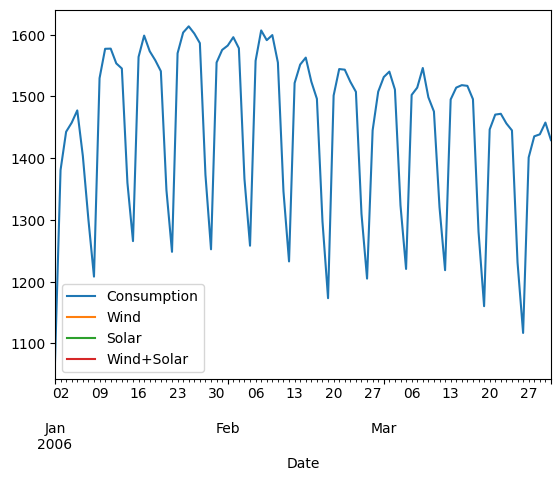

In [140]:
d.loc['2006-01':'2006-03'].plot()

<Axes: xlabel='Date'>

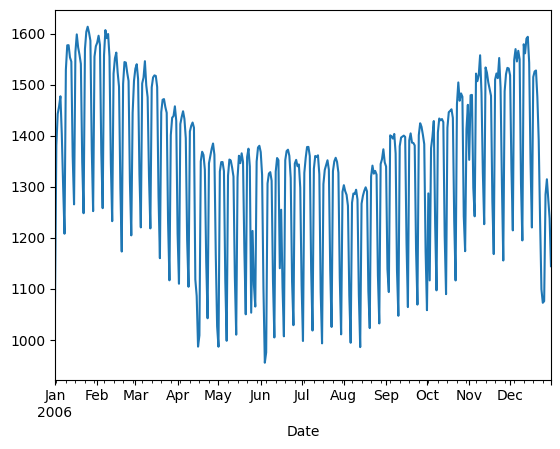

In [142]:
d['Consumption'].loc['2006'].plot()

In [157]:
d[d['Solar'].notna()]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-01,948.12800,227.465,6.587,234.052
2012-01-02,1269.58100,207.327,6.574,213.901
2012-01-03,1334.74500,473.468,24.679,498.147
2012-01-04,1347.13600,499.804,14.681,514.485
2012-01-05,1376.65800,523.851,5.071,528.922
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


<Axes: xlabel='Date'>

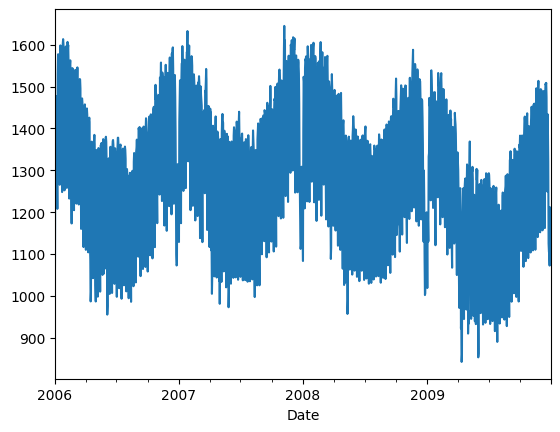

In [159]:
d['Consumption'].loc[:'2009'].plot()

<Axes: xlabel='Date'>

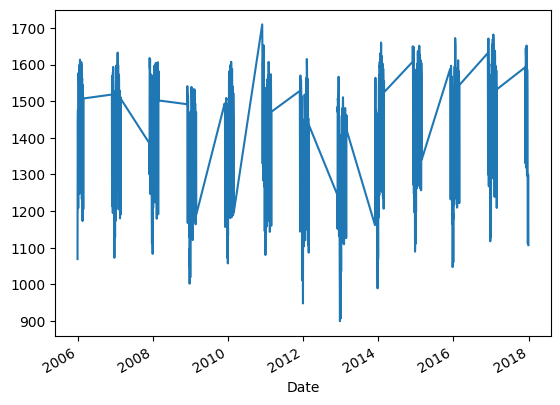

In [170]:
d[(d.index.month == 12) | (d.index.month == 1) | (d.index.month == 2)]['Consumption'].plot()

<Axes: xlabel='Date'>

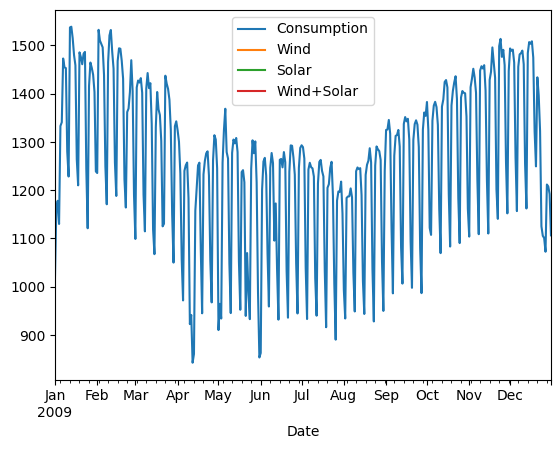

In [172]:
d.loc['2009'].plot()

<Axes: xlabel='Date'>

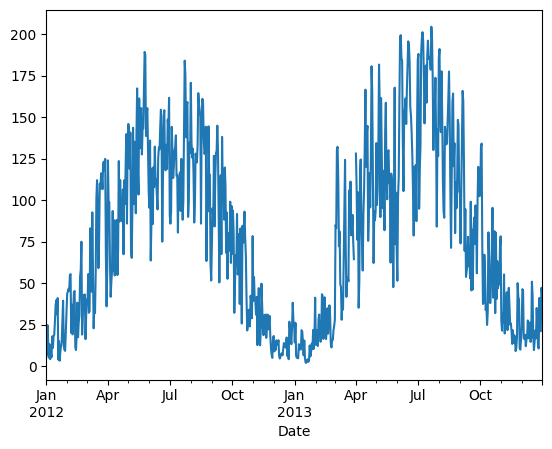

In [182]:
# d.loc['2012']['Consumption'].plot()
d.loc['2012':'2013']['Solar'].plot()


<Axes: xlabel='Date'>

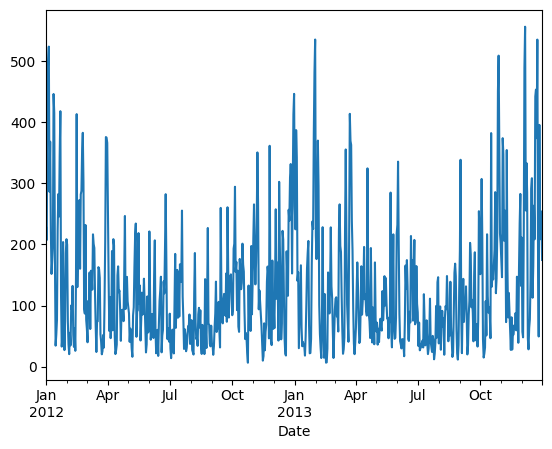

In [181]:
d.loc['2012':'2013']['Wind'].plot()

In [185]:
d['Year']= d.index.year
d['Month']= d.index.month
d['Day']= d.index.day

<Axes: title={'center': 'Consumption'}, xlabel='Month'>

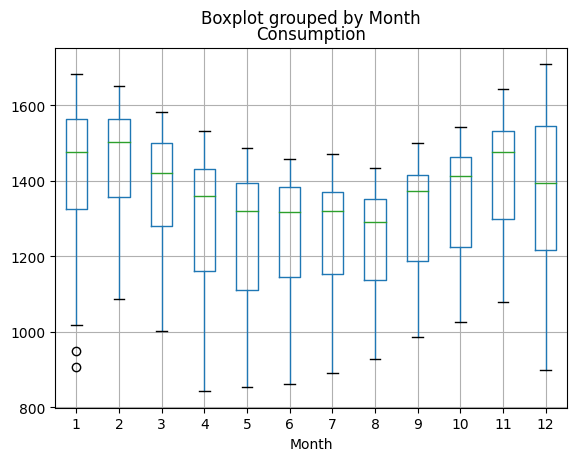

In [186]:
d.boxplot(column=['Consumption'], by='Month')

<Axes: title={'center': 'Solar'}, xlabel='Month'>

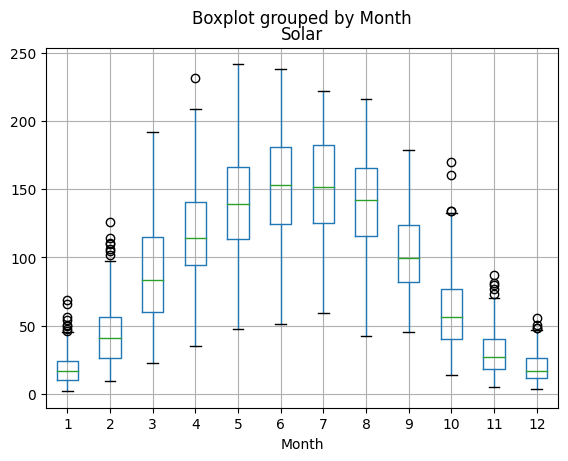

In [187]:
d.boxplot(column=['Solar'], by='Month')

<Axes: title={'center': 'Wind'}, xlabel='Month'>

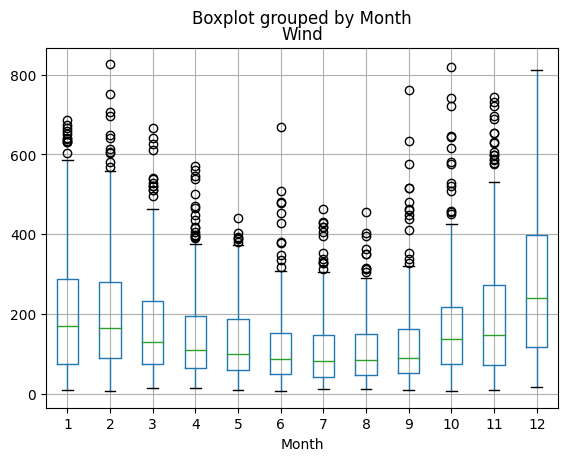

In [188]:
d.boxplot(column=['Wind'], by='Month')

<Axes: title={'center': 'Consumption'}, xlabel='Day'>

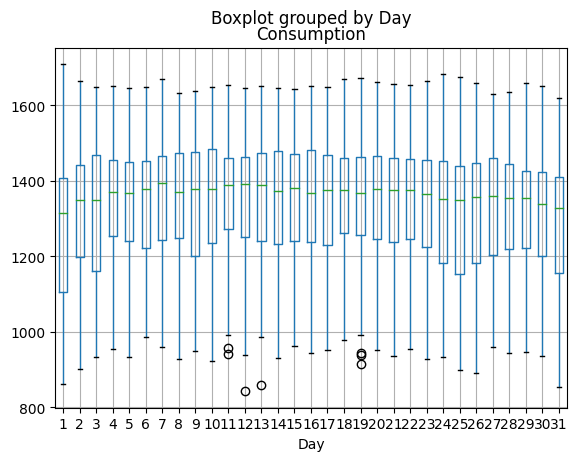

In [189]:
d.boxplot(column=['Consumption'], by='Day')

In [192]:
d['Weekday']= d.index.weekday

<Axes: title={'center': 'Consumption'}, xlabel='Weekday'>

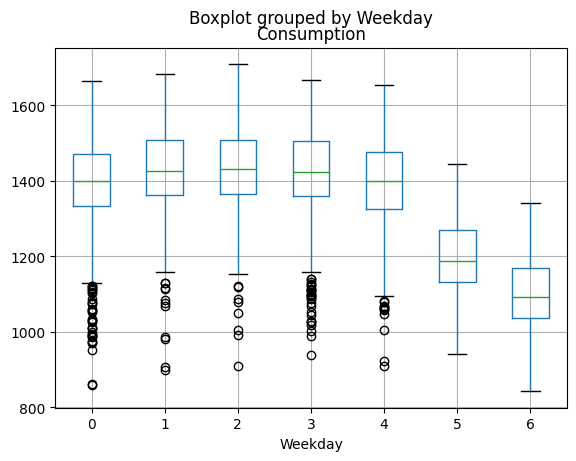

In [194]:
d.boxplot(column=['Consumption'], by='Weekday')

<Axes: title={'center': 'Wind'}, xlabel='Weekday'>

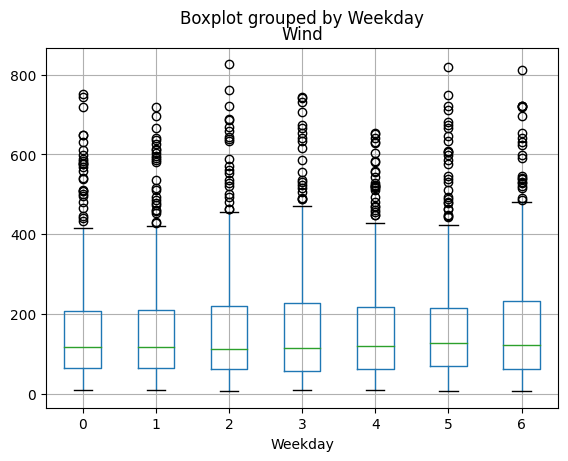

In [195]:
d.boxplot(column=['Wind'], by='Weekday')

<Axes: title={'center': 'Solar'}, xlabel='Weekday'>

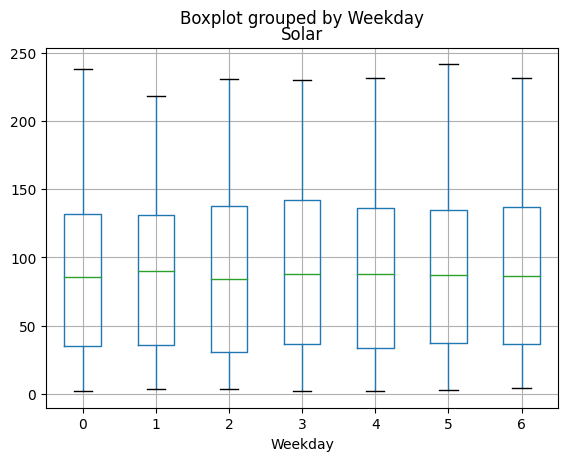

In [196]:
d.boxplot(column=['Solar'], by='Weekday')

<Axes: xlabel='Date'>

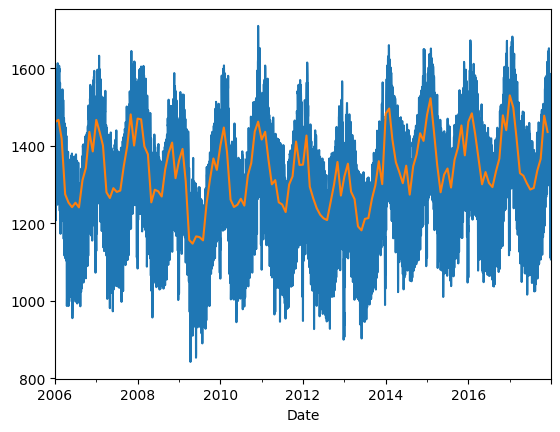

In [202]:
d['Consumption'].plot()
d.resample("M").mean()['Consumption'].plot()

In [203]:
data_weekly = d.resample('W').mean()

<Axes: xlabel='Date'>

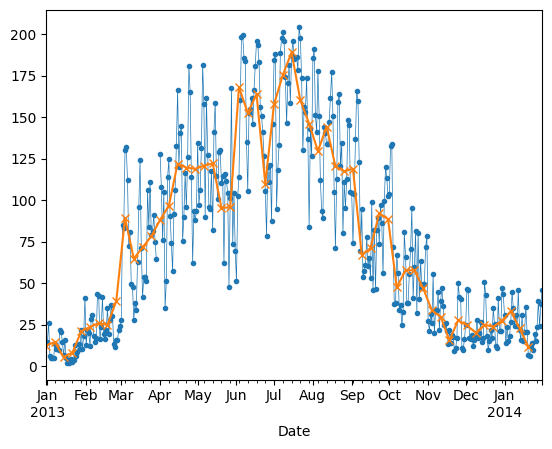

In [210]:
start, end = '2013-01', '2014-01'


d.loc[start:end]['Solar'].plot(marker='.', linestyle='-', linewidth=0.5)
data_weekly[start:end]['Solar'].plot(marker='x', linestyle='-')